# CRCNS PFC2 Dataset
Spike with 96 channel LFP (PFC: 1-64, CA1: 65-96)

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/Lauren/Voytek/spectralCV')
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')

In [88]:
%matplotlib inline

# imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
CKEYS = plt.rcParams['axes.prop_cycle'].by_key()['color']

import neurodsp as ndsp
from scv_funcs import lfpca
from scv_funcs import utils

In [93]:
datafile ="/Users/rdgao/Documents/data/CRCNS/pfc2/EE.049/EEG049_LFP.mat"
data_struct = sp.io.loadmat(datafile, squeeze_me=True)
data = data_struct['lfp'][:96,:]
t = data_struct['t']

In [41]:
fs = data_struct['fs'] #1250
analysis_param = {'nperseg': 1250,
                 'noverlap': 0,
                 'spg_outlierpct': 2.,
                 'max_freq':200}

# initialize object with data and parameters
pfc_lfpca = lfpca.LFPCA(analysis_param)
pfc_lfpca.populate_ts_data(data[::4,:], fs) # take every 8th channel(2 per shank)
#pfc_lfpca.populate_ts_data(data, fs)

# compute all spectral attributes
pfc_lfpca.compute_all_spectral()

In [42]:
# compute KS-test fit against null exponential hypothesis
pfc_lfpca.compute_KS_expfit() # this takes a few minutes

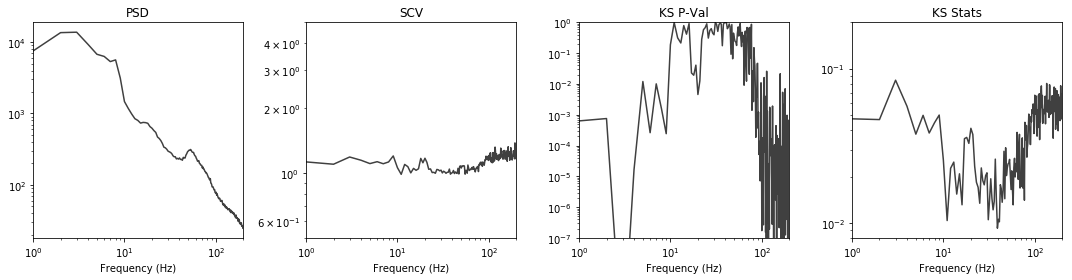

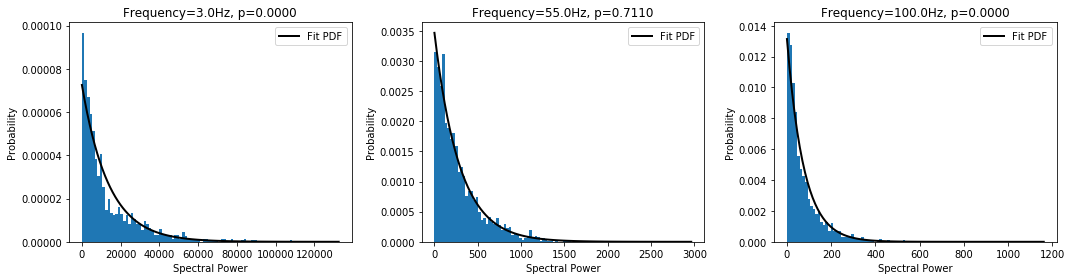

In [47]:
plot_chan = 10

plt.figure(figsize=(15,4))
pfc_lfpca.plot_spectral(plot_mean=False, plot_chan=plot_chan)

plot_freqs = [3,55,100]
plt.figure(figsize=(15,4))
for i,f in enumerate(plot_freqs):
    plt.subplot(1,3,i+1)
    pfc_lfpca.plot_expfit(chan=plot_chan, freq_ind=f)

plt.tight_layout()

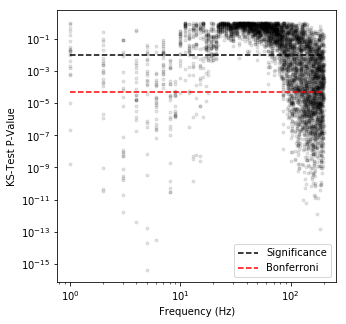

In [48]:
# plot
sig_alpha = 0.01
plt.figure(figsize=(5,5))
plt.loglog(pfc_lfpca.f_axis, pfc_lfpca.ks_pvals[:,:].T, 'k.', alpha=0.1)
plt.plot(pfc_lfpca.f_axis, np.ones_like(pfc_lfpca.f_axis)*sig_alpha, 'k--', label='Significance')
plt.plot(pfc_lfpca.f_axis, np.ones_like(pfc_lfpca.f_axis)*sig_alpha/len(pfc_lfpca.f_axis), 'r--', label='Bonferroni')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('KS-Test P-Value');

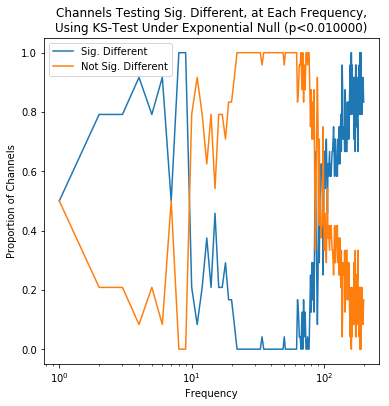

In [53]:
sig_thres = sig_alpha/len(pfc_lfpca.f_axis)*200
bins = [0,sig_thres,1]
plt.figure(figsize=(6,6))
hs = np.array([np.histogram(pfc_lfpca.ks_pvals[:,freq], bins)[0] for freq in range(len(pfc_lfpca.f_axis))])
plt.semilogx(pfc_lfpca.f_axis,hs/pfc_lfpca.numchan)
plt.xlabel('Frequency')
plt.ylabel('Proportion of Channels')
plt.legend(('Sig. Different','Not Sig. Different'))
plt.title('Channels Testing Sig. Different, at Each Frequency,\nUsing KS-Test Under Exponential Null (p<%f)'%sig_thres);

/Users/rdgao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


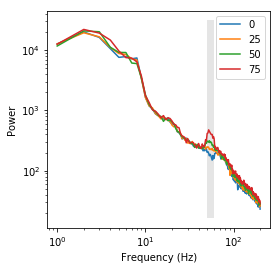

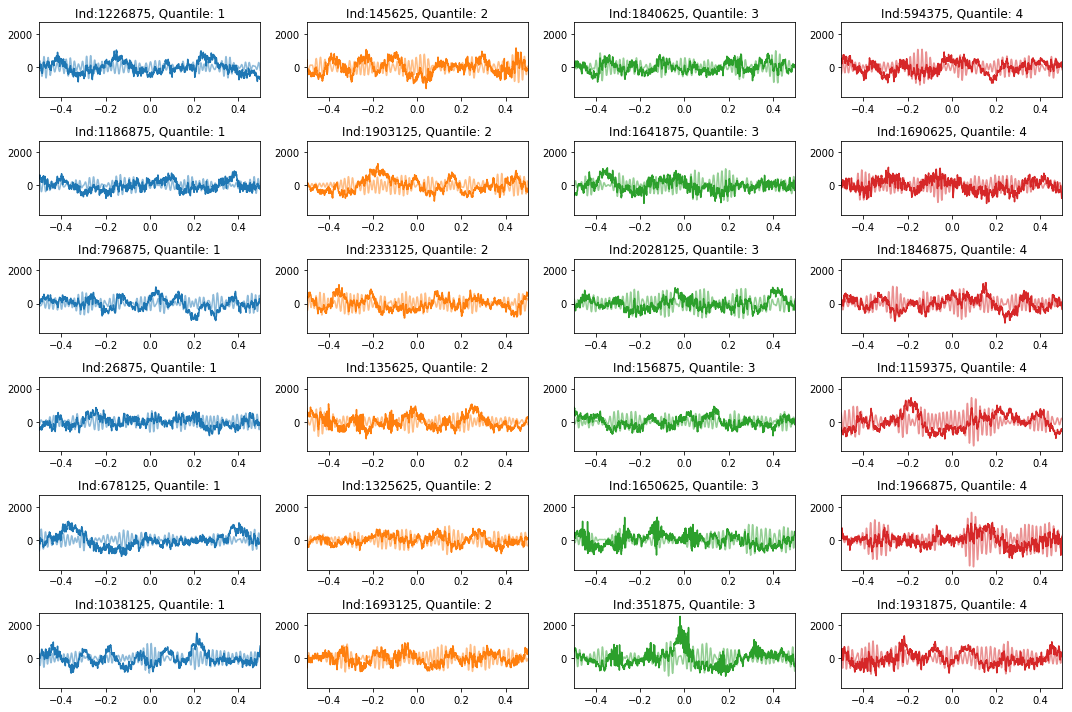

In [136]:
plot_chan = 0
rank_freqs = (50,60)
plt.figure(figsize=(4,4))
pwr_dgt, power_binned = utils.percentile_spectrogram(pfc_lfpca.spg[plot_chan,:,:], pfc_lfpca.f_axis, rank_freqs=rank_freqs, pct=range(0,100,25))
plt.figure(figsize=(15,10))
utils.plot_power_examples(lf.data[plot_chan,:], lf.fs, lf.t_axis, pwr_dgt, rank_freqs)